# The Sparks Foundation Internship

## Task - 1 : Preduction using Supervised Machine Learing

#### Statement :
Predict the percentage of an student based on the no. of study hours.

#### Goal:
What will be the predicted score ,if a student studeies for 9.25 hrs/day

### Author : Thomas Jerry Arackal

## Importing  Dataset

Importing all required libraries for the process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [3]:
df = pd.read_csv(r'D:\Data Analysis Notes\Python_ML Notes\task 1 data.csv')

print("uploaded data")


#Used to read first 10 rows of dataset-.head()
df.head(10)

uploaded data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Overview

From the give dataset we have.

In [3]:
#Used to find Number of rows and columns in the dataset

df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# This shows the descriptive statistics about the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# To check null value and adding them
df.isnull().sum() 

Hours     0
Scores    0
dtype: int64

### Visualization of the Data

Let's plot the data points to graph. Since there are only two attributes we can check , if it has any relationship with each data.

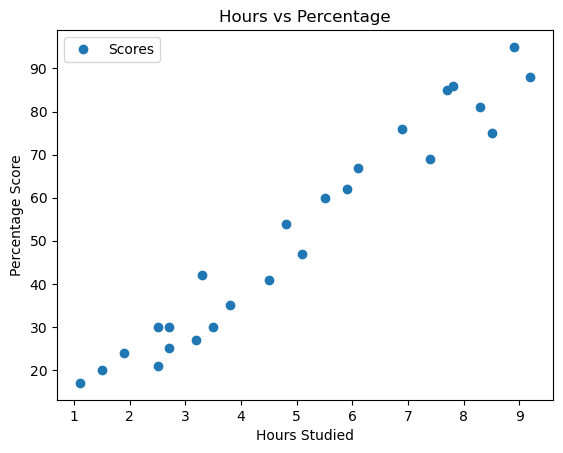

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

The above Scatter plot shows the relationship between Students Study hours and their repspctive Scores.

### CONCLUSION
From above graph we conclude that as Study hours increasing then marks also increasing

## Machine learning algorithm.

In this we will be using the Python Scikit-Learn library for machine learning process.This can be used to implement regression funtion.

Since we have only two variables we can use simple linear regression.

Python Scikit-Learn library is sklearn.And from this library we will be calling methods for the algorithm.

### Preparing the Dataset 

In [5]:
# Data Cleaning
df.mean()
data2=df.fillna(df.mean())
data2.isnull().sum()

Hours     0
Scores    0
dtype: int64

Now we are going to split the colums into "attributes" as input and "labels" as output

In [6]:
#Split the dataset fpr trainig
x = data2.iloc[:, :-1].values  
y = data2.iloc[:, 1].values  
#checking
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25,)


To train the model we have to divide the dataset into two ,one as training set and otherone as test set.

For that we have to use, the Python Scikit-Learn built in train_test_split() method.

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#checking
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x train (20, 1)
shape of y train (20,)
shape of x_test (5, 1)
shape of y_test (5,)


### Training the Algorithm

Now we are going to train the algorithm by using linear regression method.


In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

#checking
print("Training complete.")

Training complete.


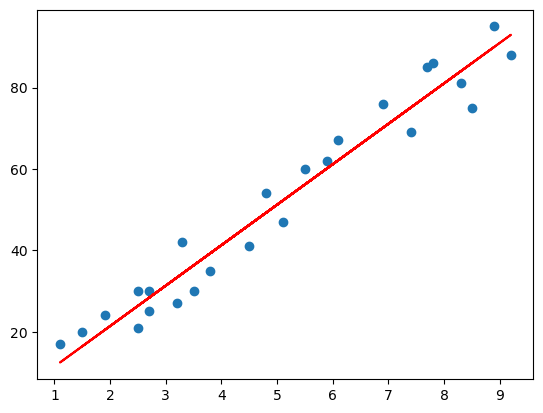

In [9]:
# Plotting the regression line
# y=mx+c formula is used.

line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

   ### Making Prediction

Now we are going to make some sample prediction.

In [15]:
 # Testing data - In Hours
print(x_test)
 # Predicting the scores
y_pred = regressor.predict(x_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [16]:
sample = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
sample 

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


By using trained model , now we can make prediction with our data.

In [10]:
#regression.predict takes a 2d array of values you want to predict on.
#Each item in the array is a "point" you want your model to predict on. 
hours= 9.25
test = np.array([hours])
test= test.reshape(-1,1)
own_pred =regressor.predict(test)

In [11]:
print("No of Hours =  " ,hours)
print("Predicted Score = {}".format(own_pred[0]))

No of Hours =   9.25
Predicted Score = 93.45860055685799


  If student will studied 9.25 Hours then the predicted score of student is 93.45860056

### Evaluating the model

In [17]:
from sklearn import metrics

print("Mean Absolute Error :" , metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.877039354964484
